# Simple Naive Bayes Example

Example based on Lesson 2, from Intro to Machine Learning, Sebastian Thrun and Katie Malone:

https://www.udacity.com/course/intro-to-machine-learning--ud120

In [1]:
import random
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib notebook

## Prepare our data

In [2]:
def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]
    return X_train, y_train, X_test, y_test  

We have defined a function that generates the data ('makeTerrainData'), lets call it.

In [3]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

### Define a function for training the classifier

In [4]:
from sklearn.naive_bayes import GaussianNB

def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    classifier = GaussianNB()
    classifier.fit(features_train, labels_train)
    return classifier

We have defined a function that trains the classifier, lets call it.

In [5]:
classifier = classify(features_train, labels_train)

### Show results

In [6]:
def prettyPicture(classifier, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show()

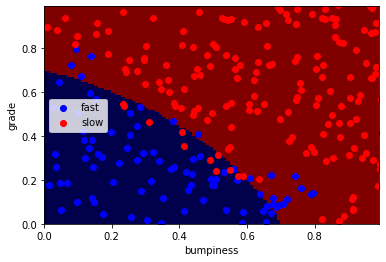

In [7]:
prettyPicture(classifier, features_test, labels_test)

### Calculate Accuracy

In [8]:
from sklearn.metrics import accuracy_score

labels_predicted = classifier.predict(features_test)
accuracy_score(labels_test, labels_predicted)

0.884

In [9]:
accuracy_score(labels_test, labels_predicted, normalize=False)

221

In [10]:
len(labels_test)

250

In [11]:
print(221/250)

0.884
